In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

%matplotlib notebook

In [2]:
fruits=pd.read_table('fruit_data_with_colors.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
fruits.shape

(59, 7)

##### Create a Label

In [5]:
lookup_fruit_name=dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### Create a Train test Split

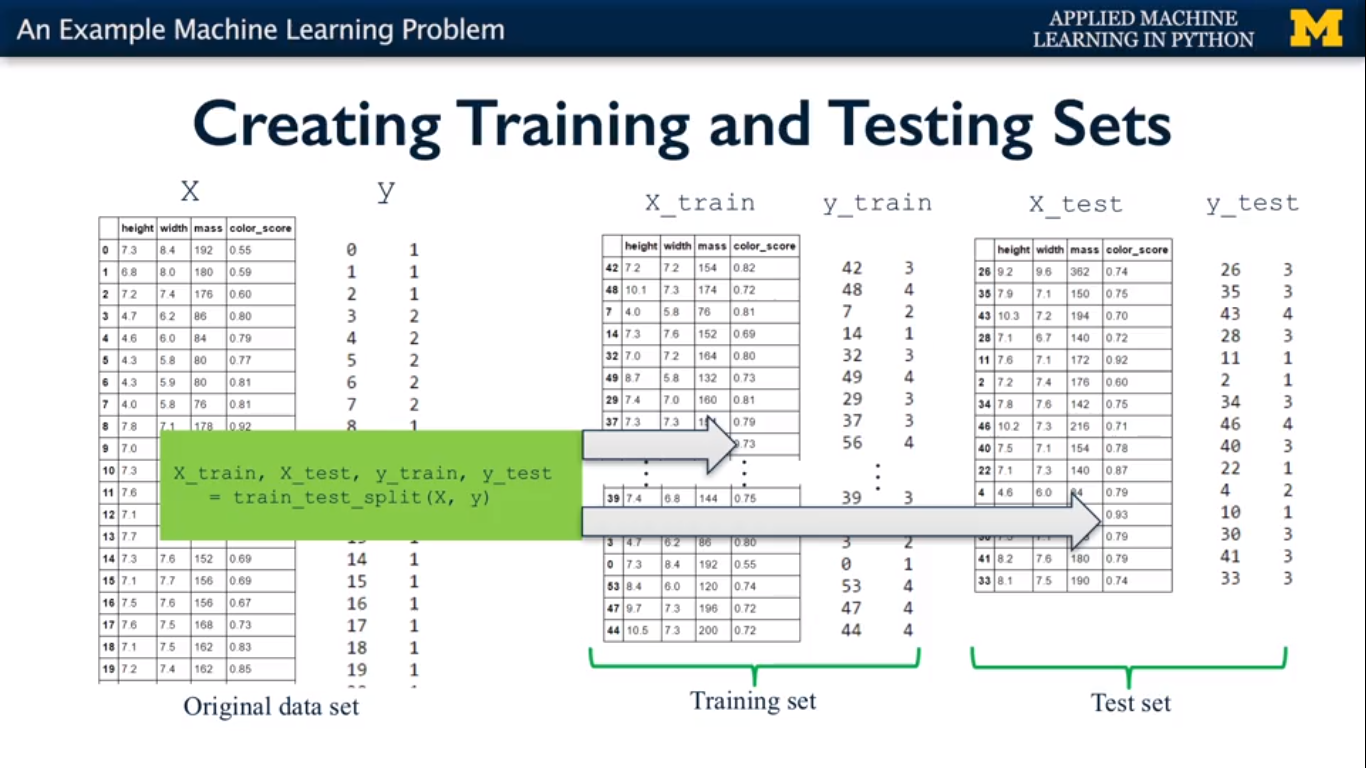

In [6]:
X=fruits[['mass','width','height']]
y=fruits['fruit_label']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [7]:
X_train.shape

(44, 3)

In [8]:
X_test.shape

(15, 3)

In [9]:
print("The Average of Splitting the data is")
print("75% for training")
print("25% for testing")
print("X_train=",y_train.count()/y.count()*100)
print("X_test=",y_test.count()/y.count()*100)

The Average of Splitting the data is
75% for training
25% for testing
X_train= 74.57627118644068
X_test= 25.423728813559322


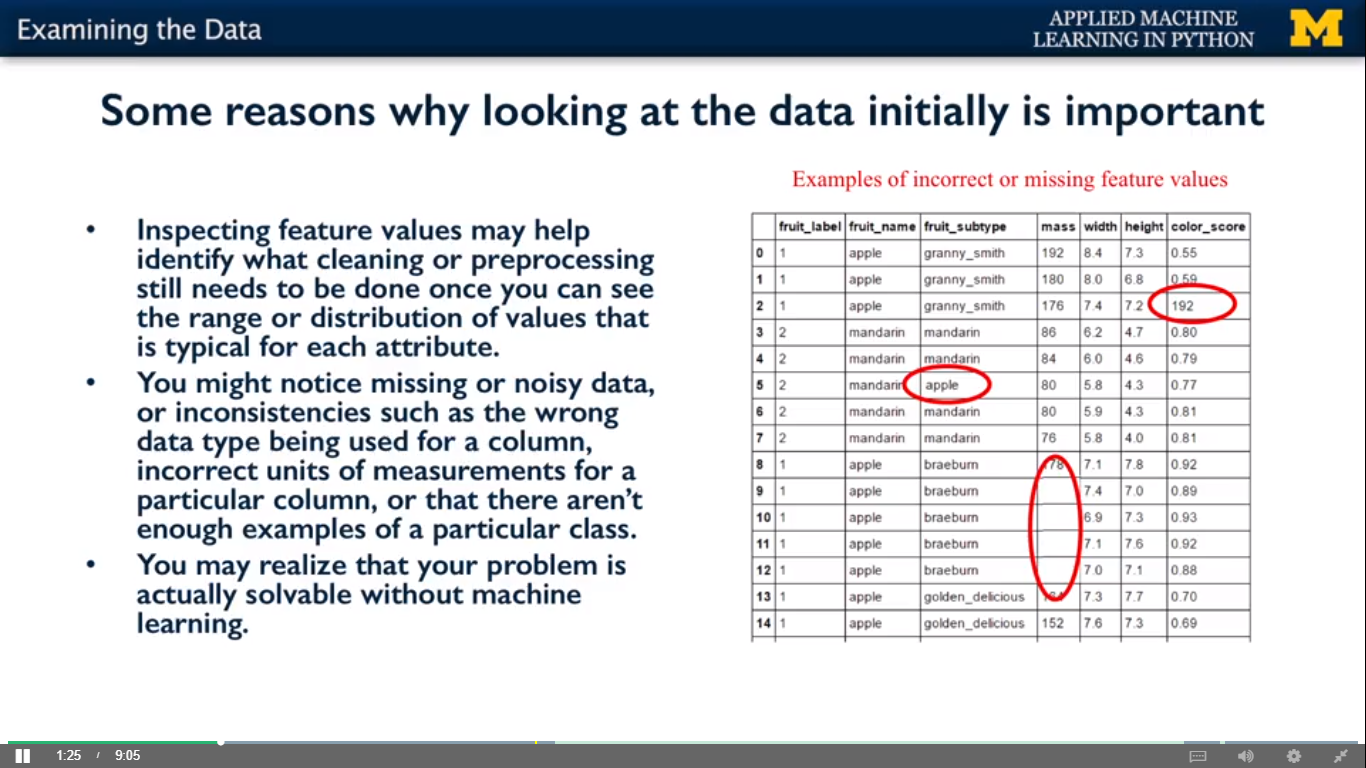


#### Create a Classifier Object

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)

##### Train The Classifier

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
knn.score(X_test,y_test)

0.5333333333333333

In [15]:
fruit_prediction=knn.predict([[20,4.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [21]:
from sklearn.linear_model import LinearRegression 

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

linreg=LinearRegression().fit(X_train,y_train)
print("Linear model intercept (b):{}".format(linreg.intercept_))
print("Linear model coef (w):{}".format(linreg.coef_))

print('R_Squared score (trainnig):{:.3f}'.format(linreg.score(X_train,y_train)))
print('R_Squared score (trainnig):{:.3f}'.format(linreg.score(X_test,y_test)))

Linear model intercept (b):9.835739409255934
Linear model coef (w):[ 0.01879966 -1.91964979  0.4226744 ]
R_Squared score (trainnig):0.726
R_Squared score (trainnig):0.120


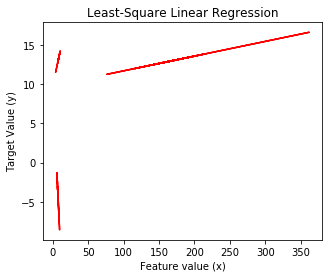

In [32]:
plt.figure(figsize=(5,4))
#plt.scatter(X,y, marker='o' , s=50 ,alpha=0.8)
plt.plot(X,linreg.coef_ * X +linreg.intercept_, 'r-')
plt.title("Least-Square Linear Regression")
plt.xlabel('Feature value (x)')
plt.ylabel('Target Value (y)')
plt.show()

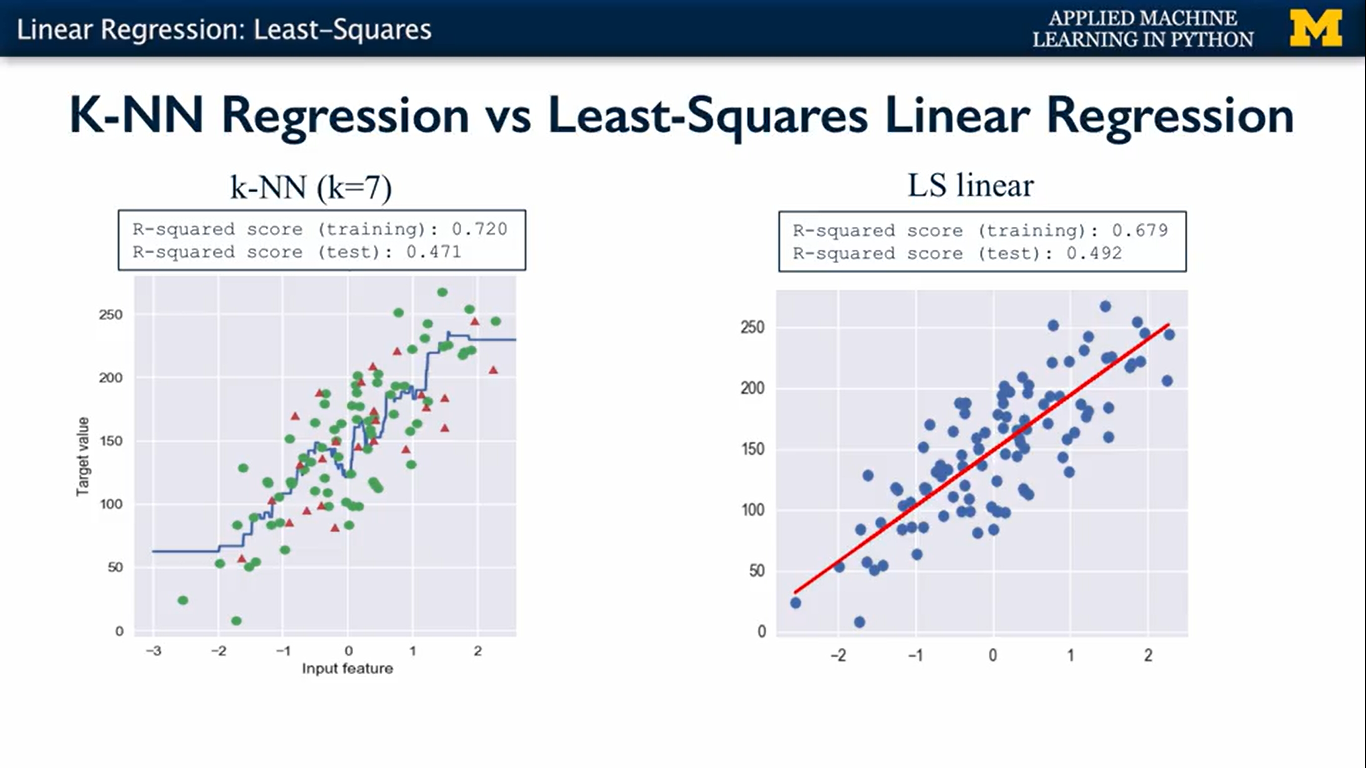